In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Подготовка данных

In [ ]:
df_games = pd.read_csv('vgsales.csv')
df_games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Возможно, при расчетах понадобятся значения столбца 'Critic_Count'.

Сразу можно изменить его тип на Int64:

In [ ]:
df_games['Critic_Count'] = df_games['Critic_Count'].astype('Int64')

# Задание 1

## 1. Как критики относятся к спортивным играм?

Датафрейм со всеми спортивными играми:

In [ ]:
df_games_sports = df_games.loc[df_games['Genre'] == 'Sports']

In [ ]:
df_games_sports['Critic_Score'].unique()

array([76., 80., 82., nan, 85., 86., 73., 94., 89., 92., 88., 98., 91.,
       84., 97., 95., 81., 90., 87., 83., 93., 67., 78., 79., 50., 77.,
       42., 66., 62., 64., 69., 70., 44., 74., 38., 59., 63., 30., 68.,
       52., 57., 75., 71., 65., 72., 47., 60., 49., 55., 40., 61., 48.,
       46., 56., 58., 53., 51., 31., 45., 26., 54., 41., 43., 39., 32.,
       36., 37., 21., 19., 24., 20., 28., 25., 35.])

In [ ]:
df_games_sports = df_games_sports[~df_games_sports['Critic_Score'].isna()]

Датафрейм со всеми играми кроме спортивных:

In [ ]:
df_games_other = df_games.loc[df_games['Genre'] != 'Sports']

Гипотезы:

- H0: Отношение критиков к спортивным играм и ко всем остальным одинаково.
- H1: Отношение критиков к спортивным и ко всем остальным отличается.

Пороговый уровень статистической значимости:

- α = 0.05

In [ ]:
stat, p = stats.ttest_1samp(a=df_games_sports['Critic_Score'],
                            popmean=df_games_other['Critic_Score'].mean())

print(f'Статистика = {stat}\np = {p}\n')

if p > 0.05:
  print('Не отклоняем нулевую гипотезу')
else:
  print('Отклоняем нулевую гипотезу')

Статистика = 8.755317599633456
p = 6.838888719772045e-18

Отклоняем нулевую гипотезу


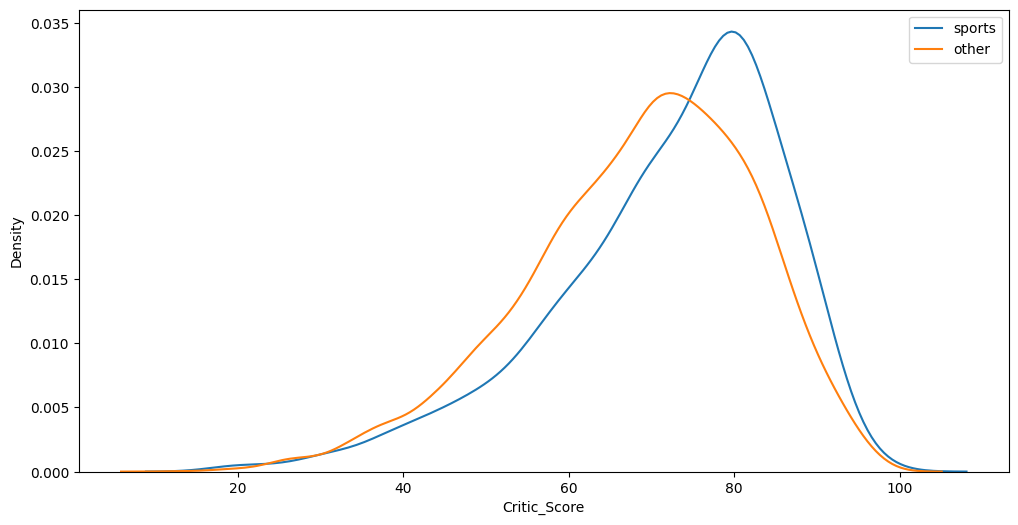

In [ ]:
plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df_games_sports['Critic_Score'], label='sports')
sns.kdeplot(data=df_games_other['Critic_Score'], label='other')
plt.legend()
plt.show()

In [ ]:
mean_sports = df_games_sports['Critic_Score'].mean()
mean_other = df_games_other['Critic_Score'].mean()

print(f'''Средняя оценка критиков для спортивных игр: {mean_sports}
Средняя оценка критиков для остальных игр: {mean_other}''')

Средняя оценка критиков для спортивных игр: 71.96817420435511
Средняя оценка критиков для остальных игр: 68.4516779490134


Одновыборочный т-тест показал значение p-value < 0.5.

Поэтому отклоняем нулевую гипотезу о том, что среднее отношение критиков к спортивным играм и ко всем остальным одинаково (есть статистически значимая разница между оценками спортивных игр и всех остальных).

Среднее значение оценки спортивных игр выше. То есть при уровне доверия 95% критики относятся к спортивным играм лучше чем ко всем остальным.

## 2. Критикам нравятся больше игры на PC или на PS4?

In [ ]:
df_games_pc = df_games.loc[df_games['Platform'] == 'PC']
df_games_ps4 = df_games.loc[df_games['Platform'] == 'PS4']

In [ ]:
df_games_pc = df_games_pc[~df_games_pc['Critic_Score'].isna()]
df_games_ps4 = df_games_ps4[~df_games_ps4['Critic_Score'].isna()]

Гипотезы:

- H0: Отношение критиков к играм на PC и на PS4 одинаково.
- H1: Отношение критиков к играм на PC и на PS4 отличается.

Пороговый уровень статистической значимости:

- α = 0.05

Проверка равенства дисперсий:

In [ ]:
def f_test(x, y):
    f = np.var(x, ddof=1)/np.var(y, ddof=1)
    nun = x.size-1
    dun = y.size-1
    p = 1-stats.f.cdf(f, nun, dun)
    return f, p

In [ ]:
stat, p = f_test(df_games_pc['Critic_Score'], df_games_ps4['Critic_Score'])

print(f'Статистика = {stat}\np = {p}\n')

if p > 0.05:
  print('Не отклоняем нулевую гипотезу, дисперсии, вероятно, равны')
else:
  print('Отклоняем нулевую гипотезу, дисперсии, вероятно, не равны')

Статистика = 0.8004247536280203
p = 0.9860083031690594

Не отклоняем нулевую гипотезу, дисперсии, вероятно, равны


In [ ]:
stat, p = stats.ttest_ind(df_games_pc['Critic_Score'],
                          df_games_ps4['Critic_Score'])

print(f'Статистика = {stat}\np = {p}\n')

if p > 0.05:
  print('Не отклоняем нулевую гипотезу')
else:
  print('Отклоняем нулевую гипотезу')

Статистика = 4.544112457929973
p = 6.215797831285281e-06

Отклоняем нулевую гипотезу


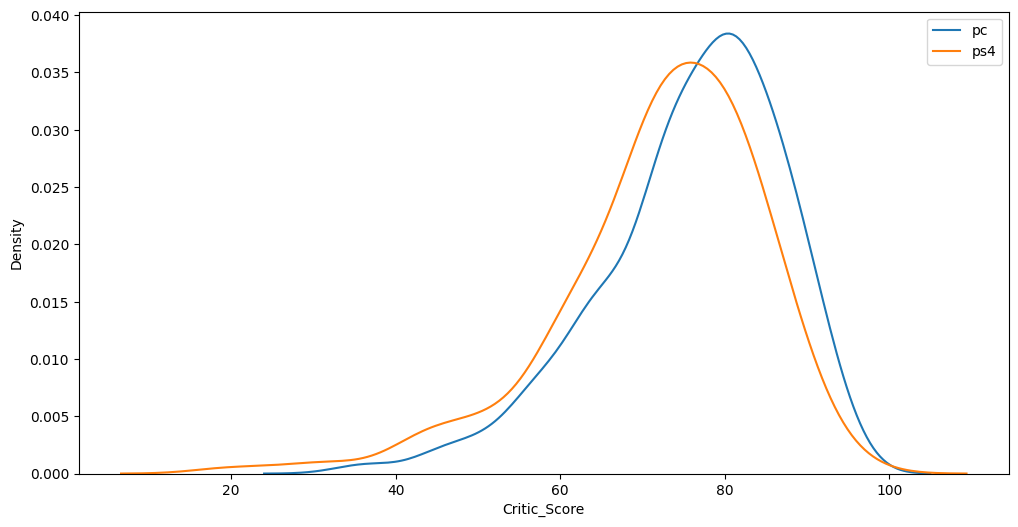

In [ ]:
plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df_games_pc['Critic_Score'], label='pc')
sns.kdeplot(data=df_games_ps4['Critic_Score'], label='ps4')
plt.legend()
plt.show()

In [ ]:
mean_pc = df_games_pc['Critic_Score'].mean()
mean_ps4 = df_games_ps4['Critic_Score'].mean()

print(f'''Средняя оценка критиков игр на PC: {mean_pc}
Средняя оценка критиков игр на PS4: {mean_ps4}''')

Средняя оценка критиков игр на PC: 75.92867132867133
Средняя оценка критиков игр на PS4: 72.09126984126983


Т-тест для двух выборок показал значение p-value < 0.5.

Поэтому отклоняем нулевую гипотезу о том, что среднее отношение критиков к играм на PC и на PS4 одинаково (есть статистически значимая разница между оценками игр на PC и на PS4).

Средняя оценка игр на PC выше. То есть при уровне доверия 95% критики относятся к играм на PC лучше чем к играм на PS4.

## 3. Критикам больше нравятся стрелялки или стратегии?

In [ ]:
df_games_shooter = df_games.loc[df_games['Genre'] == 'Shooter']
df_games_strategy = df_games.loc[df_games['Genre'] == 'Strategy']

In [ ]:
df_games_shooter = df_games_shooter[~df_games_shooter['Critic_Score'].isna()]
df_games_strategy = df_games_strategy[~df_games_strategy['Critic_Score'].isna()]

Гипотезы:

- H0: Отношение критиков к стрелялкам и стратегиям одинаково.
- H1: Отношение критиков к стрелялкам и стратегиям отличается.

Пороговый уровень статистической значимости:

- α = 0.05

In [ ]:
# проверка равенства дисперсий

stat, p = f_test(df_games_shooter['Critic_Score'],
                 df_games_strategy['Critic_Score'])

print(f'Статистика = {stat}\np = {p}\n')

if p > 0.05:
  print('Не отклоняем нулевую гипотезу, дисперсии, вероятно, равны')
else:
  print('Отклоняем нулевую гипотезу, дисперсии, вероятно, не равны')

Статистика = 1.5136376950971833
p = 1.083707256299693e-05

Отклоняем нулевую гипотезу, дисперсии, вероятно, не равны


In [ ]:
stat, p = stats.ttest_ind(df_games_shooter['Critic_Score'],
                          df_games_strategy['Critic_Score'], equal_var=False)

print(f'Статистика = {stat}\np = {p}\n')

if p > 0.05:
  print('Не отклоняем нулевую гипотезу')
else:
  print('Отклоняем нулевую гипотезу')

Статистика = -2.2972408230640315
p = 0.021938989522304823

Отклоняем нулевую гипотезу


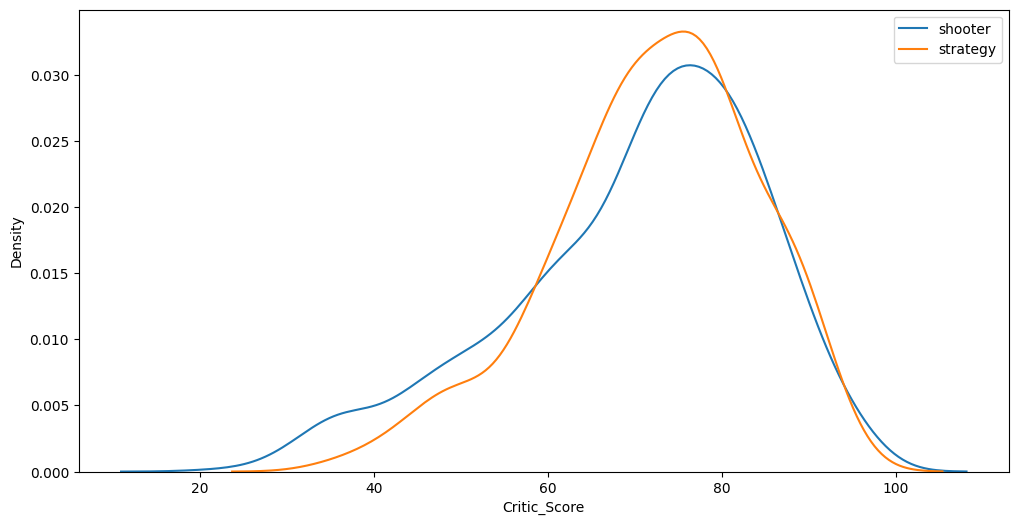

In [ ]:
plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df_games_shooter['Critic_Score'], label='shooter')
sns.kdeplot(data=df_games_strategy['Critic_Score'], label='strategy')
plt.legend()
plt.show()

In [ ]:
mean_shooter = df_games_shooter['Critic_Score'].mean()
mean_strategy = df_games_strategy['Critic_Score'].mean()

print(f'''Средняя оценка критиков для стрелялок: {mean_shooter}
Средняя оценка критиков для стратегий: {mean_strategy}''')

Средняя оценка критиков для стрелялок: 70.18114406779661
Средняя оценка критиков для стратегий: 72.08609271523179


Т-тест для двух выборок показал значение p-value < 0.5.

Поэтому отклоняем нулевую гипотезу о том, что среднее отношение критиков к  к стрелялкам и стратегиям одинаково (есть статистически значимая разница между оценками).

Средняя оценка для стратегий выше. То есть при уровне доверия 95% критики относятся к стратегиям лучше чем к стрелялкам.

Значение p получилось равным 0.022.

Получается, указав уровень статистической значимости 2%, нулевая гипотеза не будет отклонена.

In [ ]:
# пороговый уровень статистической значимости = 0.02

stat, p = stats.ttest_ind(df_games_shooter['Critic_Score'],
                          df_games_strategy['Critic_Score'], equal_var=False)

print(f'Статистика = {stat}\np = {p}\n')

if p > 0.02:
  print('Не отклоняем нулевую гипотезу')
else:
  print('Отклоняем нулевую гипотезу')

Статистика = -2.2972408230640315
p = 0.021938989522304823

Не отклоняем нулевую гипотезу




То есть при уровне доверия 98% критики относятся к стратегиям и стрелялкам одинаково (нет статистически значимой разницы между оценками).

# Задание 2

In [ ]:
df_messages = pd.read_csv('spam.csv')
df_messages.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 1. Преобразование текста в нижний регистр

In [ ]:
df_messages['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
df_messages['Message_base'] = df_messages['Message'].str.lower()
df_messages.head()

,Category,Message,Message_base
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."


## 2. Удаление лишних символов

In [ ]:
df_messages['Message_base'] = df_messages['Message_base'].replace(to_replace ='[\W]+', value = ' ', regex = True)

## 3. Удаление стоп-слов

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_messages['Message_base'] = df_messages['Message_base'].apply(
    lambda i: ' '.join(
        [word for word in i.split() if word not in english_stopwords]))

In [ ]:
df_messages.head()

,Category,Message,Message_base
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


## 4. Преобразование слов к нормальной форме

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df_messages['Message_base'] = df_messages['Message_base'].str.split()
df_messages.head()

,Category,Message,Message_base
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]"


In [ ]:
df_messages['Message_base'] = df_messages['Message_base'].apply(
    lambda i: [wordnet_lemmatizer.lemmatize(word) for word in i])
df_messages.head()

,Category,Message,Message_base
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, think, go, usf, life, around, though]"


## 5. Преобразование сообщений в вектора TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df_messages['Message_base'] = df_messages['Message_base'].apply(', '.join)

In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df_messages['Message_base'])
names = tfidf.get_feature_names_out()
X = pd.DataFrame(X.toarray(), columns=names)

## 6. Разделение данных на тестовые и тренировочные

In [ ]:
df_messages['Category_flag'] = df_messages['Category'].replace(['ham','spam'],[0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df_messages['Category_flag'], test_size=0.3, random_state=42)

## 7. Построение модели логистической регрессии

In [ ]:
lda = LogisticRegression()
lda.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lda.coef_

array([[ 0.58208166,  1.21896137, -0.01735223, ..., -0.01412364,
         0.        ,  0.        ]])

In [ ]:
lda.intercept_

array([-2.46900622])

Прогноз на тестовой выборке:

In [ ]:
y_pred = lda.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

Реальные значения для тестовой выборки:

In [ ]:
y_test.to_numpy()

array([0, 0, 0, ..., 0, 1, 0])

Оценка точности модели:

In [ ]:
import sklearn.metrics as metrics

In [ ]:
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

R2: 0.6443123520126282
MAE: 0.04126794258373206
MSE: 0.04126794258373206
RMSE: 0.20314512690126746


Коэффициент детерминации = 0.6 (модель имеет заметную значимость)

<Axes: xlabel='Category_flag', ylabel='Count'>

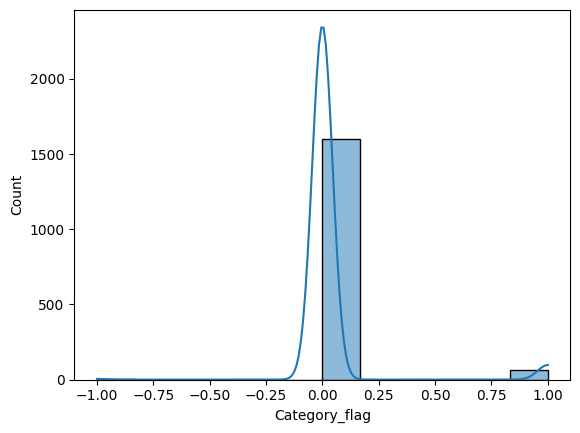

In [ ]:
sns.histplot((y_test - y_pred), kde=True)

Распределение нормальное, в основном разница между прогнозными и реальными значениями = 0.

Расчет точности:

In [ ]:
from sklearn.metrics import accuracy_score

print(f'{round(accuracy_score(y_test, lda.predict(X_test)) * 100)}%')

96%


In [ ]:
result = pd.DataFrame([y_test.to_numpy(), y_pred]).T
print(f'Модель неверно предсказала категорию сообщения для {len(result.loc[result[0] != result[1]])} из {len(result)}.')

Модель неверно предсказала категорию сообщения для 69 из 1672.


## 8. Описание результатов при помощи confusion_matrix

In [ ]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[1445,    3],
       [  66,  158]])

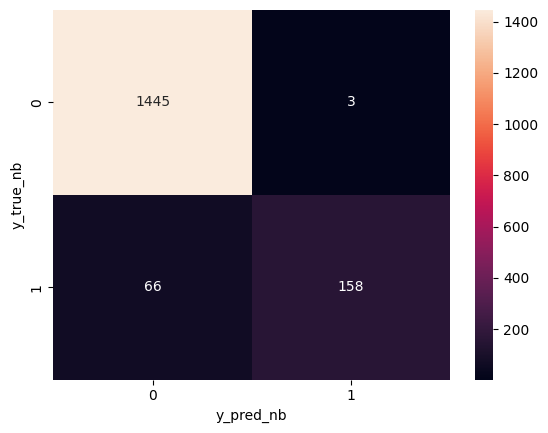

In [ ]:
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()

Модель **верно** предсказала, что:

- 158 сообщений из тестовой выборки являются спамом
- 1445 сообщений из тестовой выборки не являются спамом

Модель **неверно** предсказала, что:

- 66 сообщений из тестовой выборки не являются спамом
- 3 сообщения из тестовой выборки являются спамом

## 9. Построение датафрейма с неправильно классифицированными сообщениями

Датафрейм с неверными результатами:

In [ ]:
wrong_results = pd.DataFrame(y_test.replace([0, 1], ['ham','spam']))
wrong_results['y_pred'] = y_pred
wrong_results['y_pred'] = wrong_results['y_pred'].replace([0, 1], ['ham','spam'])
wrong_results.columns = ['Category_real', 'Category_pred']

wrong_results = wrong_results.loc[wrong_results['Category_real'] !=
                                  wrong_results['Category_pred']]
wrong_results.head()

,Category_real,Category_pred
2952,ham,spam
881,spam,ham
1961,spam,ham
3864,spam,ham
2575,spam,ham


In [ ]:
wrong_results = pd.merge(wrong_results, df_messages['Message'], left_index=True,
                         right_index=True, how='left').reset_index()

In [ ]:
wrong_results

,index,Category_real,Category_pred,Message
0,2952,ham,spam,Hey now am free you can call me.
1,881,spam,ham,Reminder: You have not downloaded the content ...
2,1961,spam,ham,Guess what! Somebody you know secretly fancies...
3,3864,spam,ham,Oh my god! I've found your number again! I'm s...
4,2575,spam,ham,Your next amazing xxx PICSFREE1 video will be ...
...,...,...,...,...
64,4543,spam,ham,FreeMsg Hi baby wow just got a new cam moby. W...
65,752,spam,ham,You have an important customer service announc...
66,309,spam,ham,TheMob> Check out our newest selection of cont...
67,495,ham,spam,Are you free now?can i call now?
